## EDA

Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import sklearn




Lecture des données

In [2]:
country_df = pandas.read_csv('datasets/Country-data.csv')
df_dictionary = pandas.read_csv('datasets/data-dictionary.csv')

In [3]:
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Analyse du dataframe

In [5]:
#verify if there are any missing values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#verify if there are duplicates
country_df.duplicated().sum()

0

- Moyenne et variance par catégorie d’information (feature)

In [7]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Matrice de corrélation

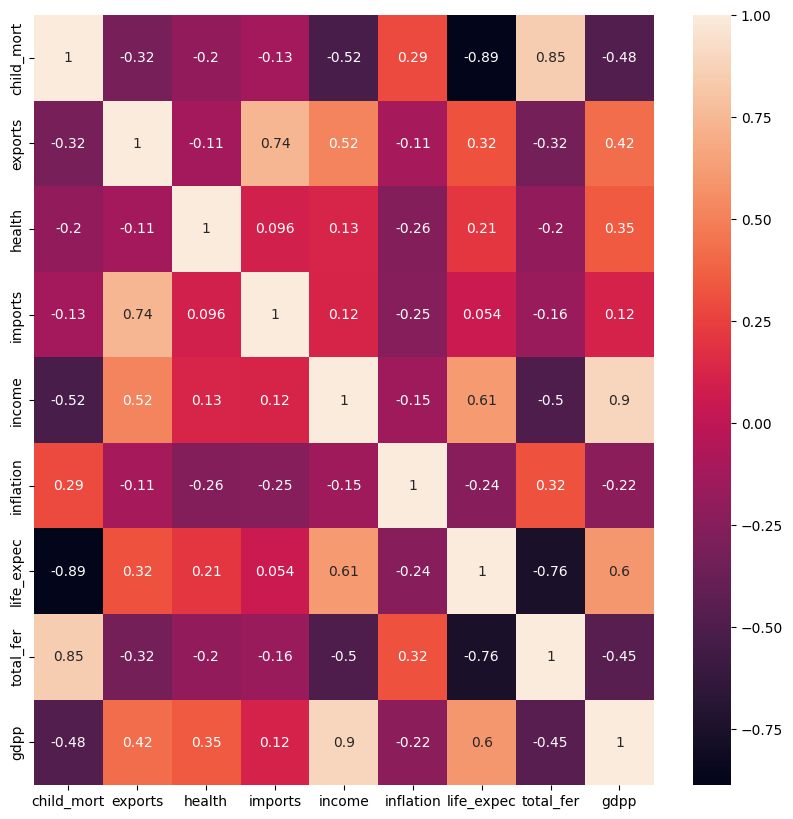

In [8]:
# plot a correlation matrix between the features exclude the country column
plt.figure(figsize=(10,10))
sns.heatmap(country_df.drop('country', axis=1).corr(), annot=True)
plt.show()


Grâce à cette matrice, on peut remarquer que lorsque la variable income augmente, alors la variable gdpp augmente aussi fortement, à l'inverse lorsque la mortalité infantile augmente, on voit que l'espérance de vie diminue.

Distribution des variables

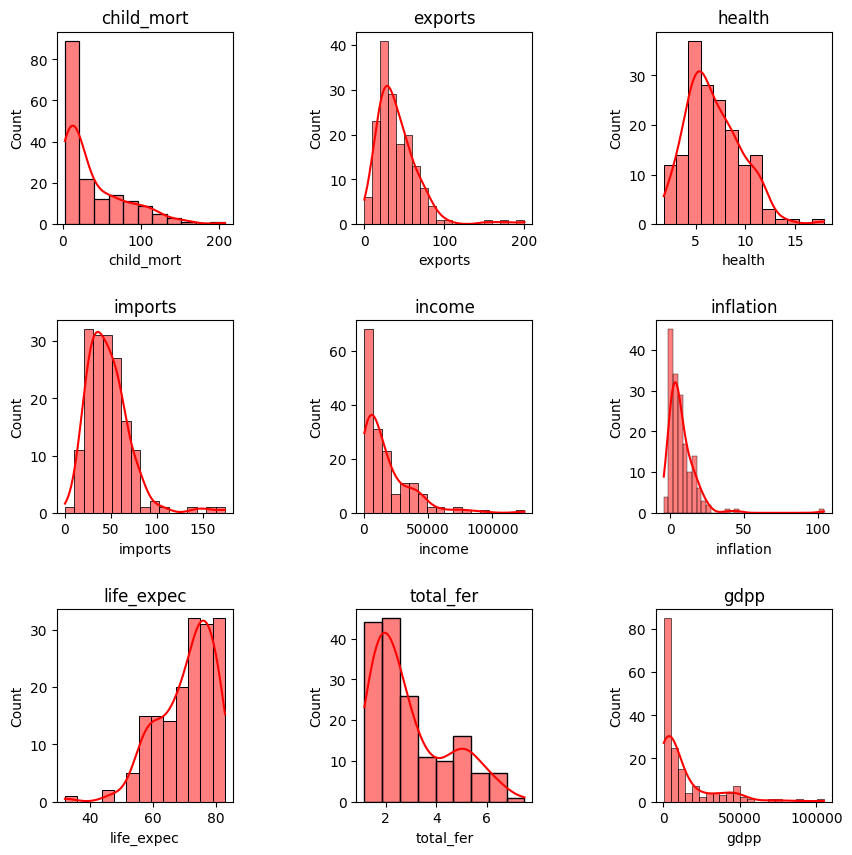

In [9]:

#plot the distribution of the features in the subplots
for i, column in enumerate(country_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    sns.histplot(country_df[column], kde=True, color='red')
    plt.title(column)

plt.subplots_adjust(wspace=0.7, hspace=0.5)
plt.gcf().set_size_inches(10, 10)


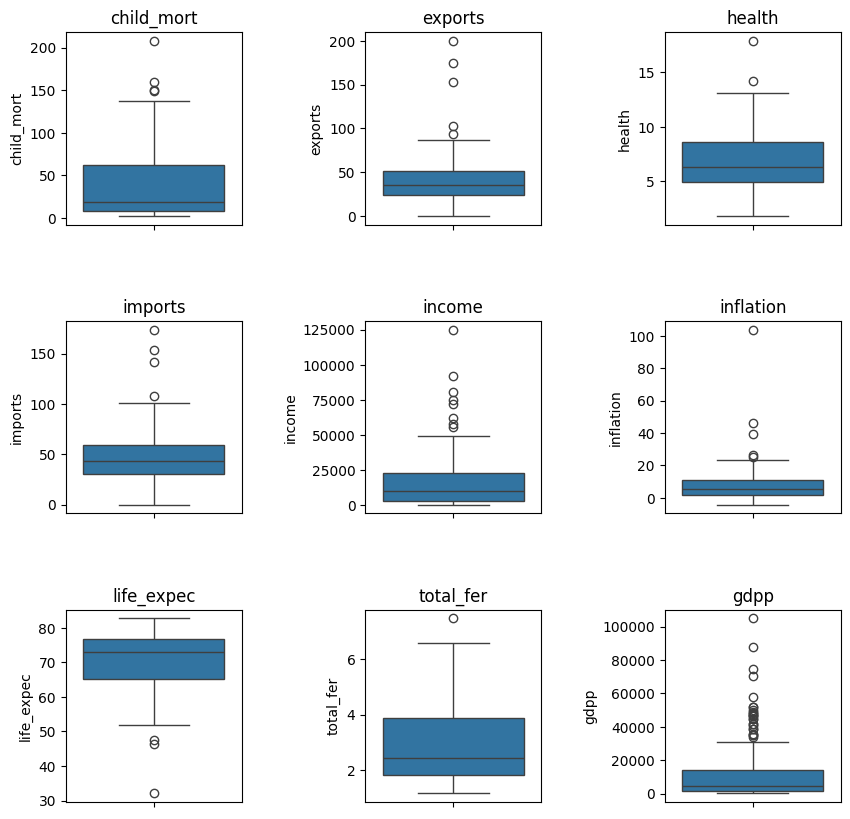

In [10]:
for i, column in enumerate(country_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=country_df[column])
    plt.title(column)

plt.subplots_adjust(wspace=0.7, hspace=0.5)
plt.gcf().set_size_inches(10, 10)


In [11]:
def plot_countries_by_feature(feature, n_countries=5, ascending=False):
    try:
        plt.figure(figsize=(10,5))
        top_countries = country_df[['country', feature]].sort_values(by=feature, ascending=ascending).head(n_countries)
        sns.barplot(x=feature, y='country', data=top_countries)
        plt.title(f'Top {n_countries} countries by {feature}')
        plt.show()
    except KeyError:
        print('Feature not found in the dataset')

    

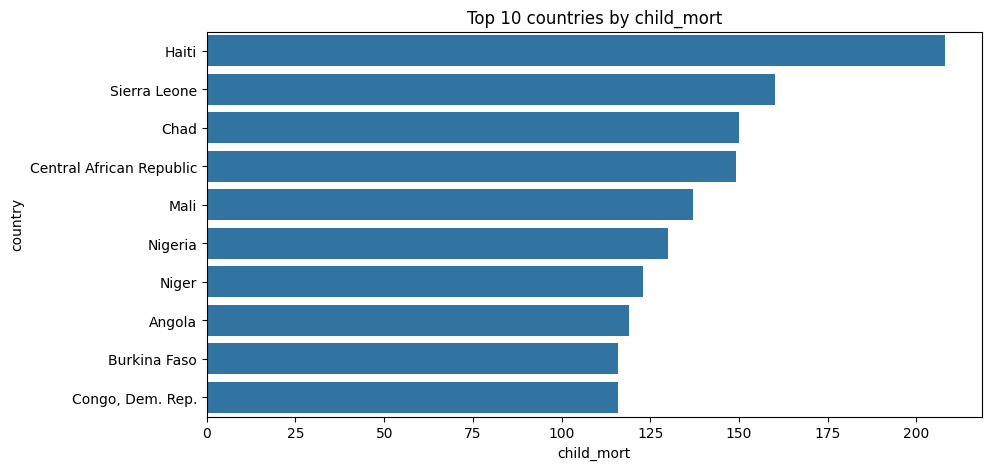

In [12]:
plot_countries_by_feature('child_mort', n_countries=10, ascending=False)

In [14]:
import plotly.express as px

fig = px.choropleth (country_df, locationmode = 'country names', locations = 'country', color = 'inflation',
                     title = "Distribution of 'GDPP' in different countries of the world"
                     , color_continuous_scale = "piyg")
fig.show()